In [1]:
# 每月收入
x = [9558, 8835, 9313, 14990, 5564, 11227, 11806, 10242, 11999, 11630,
     6906, 13850, 7483, 8090, 9465, 9938, 11414, 3200, 10731, 19880,
     15500, 10343, 11100, 10020, 7587, 6120, 5386, 12038, 13360, 10885,
     17010, 9247, 13050, 6691, 7890, 9070, 16899, 8975, 8650, 9100,
     10990, 9184, 4811, 14890, 11313, 12547, 8300, 12400, 9853, 12890]
# 每月网购支出
y = [3171, 2183, 3091, 5928, 182, 4373, 5297, 3788, 5282, 4166,
     1674, 5045, 1617, 1707, 3096, 3407, 4674, 361, 3599, 6584,
     6356, 3859, 4519, 3352, 1634, 1032, 1106, 4951, 5309, 3800,
     5672, 2901, 5439, 1478, 1424, 2777, 5682, 2554, 2117, 2845,
     3867, 2962,  882, 5435, 4174, 4948, 2376, 4987, 3329, 5002]

In [2]:
import numpy as np

np.corrcoef(x, y)

array([[1.        , 0.94862936],
       [0.94862936, 1.        ]])

In [3]:
from scipy import stats

stats.pearsonr(x, y)

PearsonRResult(statistic=0.9486293572644151, pvalue=1.2349851929269847e-25)

In [4]:
sample_data = {key: value for key, value in zip(x, y)}

In [5]:
import heapq
import statistics


def predict_by_knn(history_data, param_in, k=5):
    """用kNN算法做预测
    :param history_data: 历史数据
    :param param_in: 模型的输入
    :param k: 邻居数量（默认值为5）
    :return: 模型的输出（预测值）
    """
    neighbors = heapq.nsmallest(k, history_data, key=lambda x: (x - param_in) ** 2)
    return statistics.mean([history_data[neighbor] for neighbor in neighbors])

In [6]:
incomes = [1800, 3500, 5200, 6600, 13400, 17800, 20000, 30000]
for income in incomes:
    print(f'月收入: {income:>5d}元, 月网购支出: {predict_by_knn(sample_data, income):>6.1f}元')

月收入:  1800元, 月网购支出:  712.6元
月收入:  3500元, 月网购支出:  712.6元
月收入:  5200元, 月网购支出:  936.0元
月收入:  6600元, 月网购支出: 1487.0元
月收入: 13400元, 月网购支出: 5148.6元
月收入: 17800元, 月网购支出: 6044.4元
月收入: 20000元, 月网购支出: 6044.4元
月收入: 30000元, 月网购支出: 6044.4元


In [7]:
import statistics


def get_loss(X_, y_, a_, b_):
    """损失函数
    :param X_: 回归模型的自变量
    :param y_: 回归模型的因变量
    :param a_: 回归模型的斜率
    :param b_: 回归模型的截距
    :return: MSE（均方误差）
    """
    y_hat = [a_ * x + b_ for x in X_]
    return statistics.mean([(v1 - v2) ** 2 for v1, v2 in zip(y_, y_hat)])

In [12]:
import random

# 先将最小损失定义为一个很大的值
min_loss, a, b = 1e12, 0, 0

for _ in range(100000):
    # 通过产生随机数的方式获得斜率和截距
    _a, _b = random.random(), random.random() * 4000 - 2000
    # 带入损失函数计算回归模型的MSE
    curr_loss = get_loss(x, y, _a, _b)
    if curr_loss < min_loss:
        # 找到更小的MSE就记为最小损失
        min_loss = curr_loss
        # 记录下当前最小损失对应的a和b
        a, b = _a, _b

print(f'MSE = {min_loss}')
print(f'{a = }, {b = }')

MSE = 270779.3824610016
a = 0.48188815126630014, b = -1503.0369604764323


In [9]:
import numpy as np

x_bar, y_bar = np.mean(x), np.mean(y)
a = np.dot((x - x_bar), (y - y_bar)) / np.sum((x - x_bar) ** 2)
b = y_bar - a * x_bar
print(f'{a = }, {b = }')

a = 0.482084452824066, b = -1515.2028590756745


In [10]:
a, b = np.polyfit(x, y, deg=1)
print(f'{a = }, {b = }')

a = 0.482084452824066, b = -1515.2028590756756


In [11]:
from numpy.polynomial import Polynomial

b, a = Polynomial.fit(x, y, deg=1).convert().coef
print(f'{a = }, {b = }')

a = 0.48208445282406626, b = -1515.2028590756804


In [13]:

import numpy as np

x_bar, y_bar = np.mean(x), np.mean(y)
a = np.dot((x - x_bar), (y - y_bar)) / np.sum((x - x_bar) ** 2)
b = y_bar - a * x_bar
print(f'{a = }, {b = }')

a = 0.482084452824066, b = -1515.2028590756745


In [14]:
a, b = np.polyfit(x, y, deg=1)
print(f'{a = }, {b = }')

a = 0.482084452824066, b = -1515.2028590756756


In [15]:
from numpy.polynomial import Polynomial

b, a = Polynomial.fit(x, y, deg=1).convert().coef
print(f'{a = }, {b = }')

a = 0.48208445282406626, b = -1515.2028590756804


k最近邻算法

In [16]:
pip install scikit-learn

In [17]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.datasets import load_iris

# 加载鸢尾花数据集
iris = load_iris()
# 查看数据集的介绍
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [19]:
# 特征（150行4列的二维数组，分别是花萼长、花萼宽、花瓣长、花瓣宽）
X = iris.data
# 标签（150个元素的一维数组，包含0、1、2三个值分别代表三种鸢尾花）
y = iris.target

In [20]:
# 将特征和标签堆叠到同一个数组中
data = np.hstack((X, y.reshape(-1, 1)))
# 通过随机乱序函数将原始数据打乱
np.random.shuffle(data)
# 选择80%的数据作为训练集
train_size = int(y.size * 0.8)
train, test = data[:train_size], data[train_size:]
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3)

In [22]:
import numpy as np


def euclidean_distance(u, v):
    """计算两个n维向量的欧式距离"""
    return np.sqrt(np.sum(np.abs(u - v) ** 2))

In [23]:
from scipy import stats


def make_label(X_train, y_train, X_one, k):
    """
    根据历史数据中k个最近邻为新数据生成标签
    :param X_train: 训练集中的特征
    :param y_train: 训练集中的标签
    :param X_one: 待预测的样本（新数据）特征
    :param k: 邻居的数量
    :return: 为待预测样本生成的标签（邻居标签的众数）
    """
    # 计算x跟每个训练样本的距离
    distes = [euclidean_distance(X_one, X_i) for X_i in X_train]
    # 通过一次划分找到k个最小距离对应的索引并获取到相应的标签
    labels = y_train[np.argpartition(distes, k - 1)[:k]]
    # 获取标签的众数
    return stats.mode(labels).mode

In [24]:
def predict_by_knn(X_train, y_train, X_new, k=5):
    """
    KNN算法
    :param X_train: 训练集中的特征
    :param y_train: 训练集中的标签
    :param X_new: 待预测的样本构成的数组
    :param k: 邻居的数量（默认值为5）
    :return: 保存预测结果（标签）的数组
    """
    return np.array([make_label(X_train, y_train, X, k) for X in X_new])

In [25]:
y_pred = predict_by_knn(X_train, y_train, X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# 创建模型
model = KNeighborsClassifier()
# 训练模型
model.fit(X_train, y_train)
# 预测结果
y_pred = model.predict(X_test)

In [27]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [28]:
model.score(X_test, y_test)

0.9666666666666667

In [29]:
print(y_test)
print(y_pred)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1]
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 2 1 1 1]


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# 输出分类模型混淆矩阵
print('混淆矩阵: ')
print(confusion_matrix(y_test, y_pred))
# 输出分类模型评估报告
print('评估报告: ')
print(classification_report(y_test, y_pred))

混淆矩阵: 
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
评估报告: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



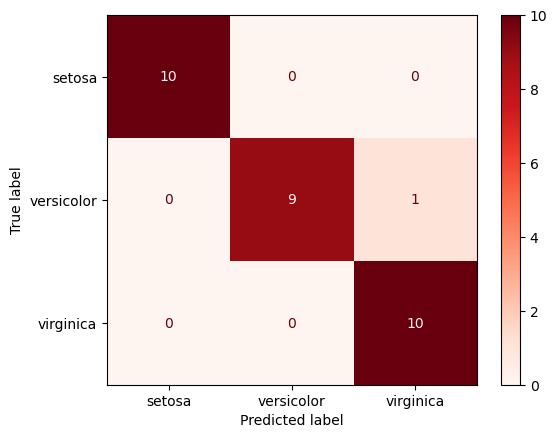

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# 创建混淆矩阵显示对象
cm_display_obj = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=iris.target_names)
# 绘制并显示混淆矩阵
cm_display_obj.plot(cmap=plt.cm.Reds)
plt.show()

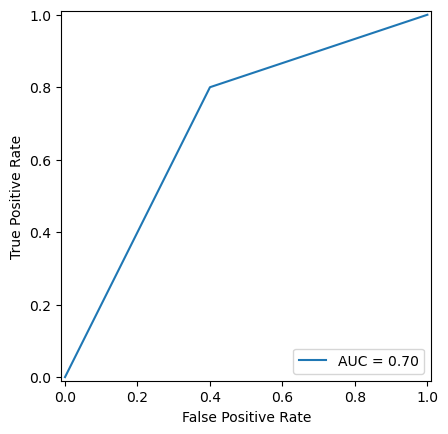

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# 手动构造一组真实值和对应的预测值
y_test_ex = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0])
y_pred_ex = np.array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1])
# 通过roc_curve函数计算出FPR（假正例率）和TPR（真正例率）
fpr, tpr, _ = roc_curve(y_test_ex, y_pred_ex)
# 通过auc函数计算出AUC值并通过RocCurveDisplay类绘制图形
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr)).plot()
plt.show()

In [33]:

from sklearn.model_selection import GridSearchCV

# 网格搜索交叉验证
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    cv=5
)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [34]:
print('最优参数:', gs.best_params_)
print('评分:', gs.best_score_)

最优参数: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
评分: 0.9666666666666666


In [35]:
# 每月收入
incomes = np.array([
    9558, 8835, 9313, 14990, 5564, 11227, 11806, 10242, 11999, 11630,
    6906, 13850, 7483, 8090, 9465, 9938, 11414, 3200, 10731, 19880,
    15500, 10343, 11100, 10020, 7587, 6120, 5386, 12038, 13360, 10885,
    17010, 9247, 13050, 6691, 7890, 9070, 16899, 8975, 8650, 9100,
    10990, 9184, 4811, 14890, 11313, 12547, 8300, 12400, 9853, 12890
])
# 每月网购支出
outcomes = np.array([
    3171, 2183, 3091, 5928, 182, 4373, 5297, 3788, 5282, 4166,
    1674, 5045, 1617, 1707, 3096, 3407, 4674, 361, 3599, 6584,
    6356, 3859, 4519, 3352, 1634, 1032, 1106, 4951, 5309, 3800,
    5672, 2901, 5439, 1478, 1424, 2777, 5682, 2554, 2117, 2845,
    3867, 2962,  882, 5435, 4174, 4948, 2376, 4987, 3329, 5002
])
X = np.sort(incomes).reshape(-1, 1)  # 将收入排序后处理成二维数组
y = outcomes[np.argsort(incomes)]    # 将网购支出按照收入进行排序

In [36]:
from sklearn.neighbors import KNeighborsRegressor

# 创建模型
model = KNeighborsRegressor()
# 训练模型
model.fit(X, y)
# 预测结果
y_pred = model.predict(X)

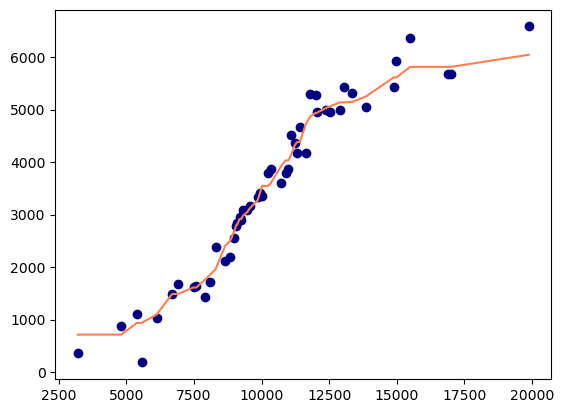

In [37]:
# 原始数据散点图
plt.scatter(X, y, color='navy')
# 预测结果折线图
plt.plot(X, y_pred, color='coral')
plt.show()

kNN 算法是一种简单但不失强大的机器学习算法，适用于小数据集上的分类和回归任务，它的优点是简单易懂，没有显示的训练过程，不依赖于对数据分布的假设，可以适应复杂的数据模式。当然，kNN 算法的缺点也非常明显，最大的问题在于计算效率，所以在数据集较大时可能并不是最好的选择。除此以外，kNN 算法对噪声非常敏感，同时预测结果依赖于 k 的取值和样本是否均衡（各个类别的样本数量是否大致相等），k 值过小可能导致过拟合，k值过大又可能导致欠拟合，而不均衡的样本可能会导致类别偏倚（Class Imbalance Bias），也就是说，如果大部分训练样本都属于类别 A，而类别 B 样本较少，那么在分类时，KNN 更容易将测试样本预测为类别 A。